In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# COnverting type object to type ints
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# Analysis

In [6]:
# Stastitical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:>

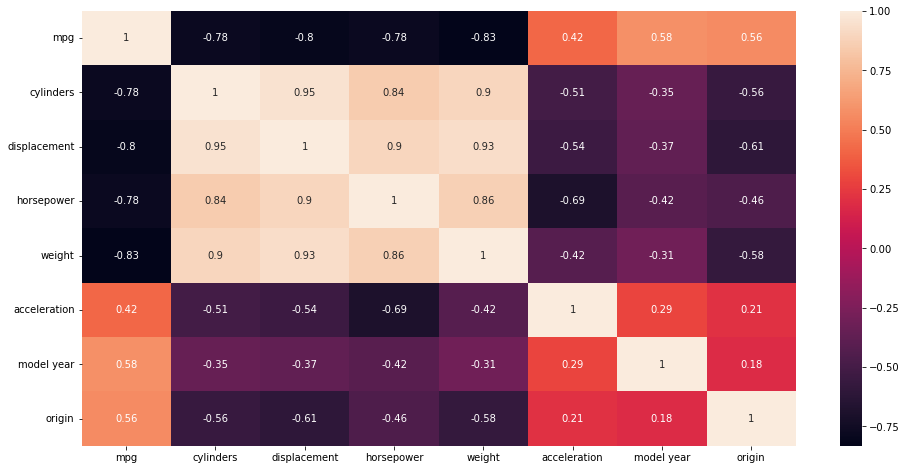

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [8]:
# measuring average MPG for each origin
# as per the data dictionary (1: American, 2: European, 3: Japanese)

df.groupby('origin')['mpg'].mean()

origin
1    20.083534
2    27.891429
3    30.450633
Name: mpg, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='mpg'>

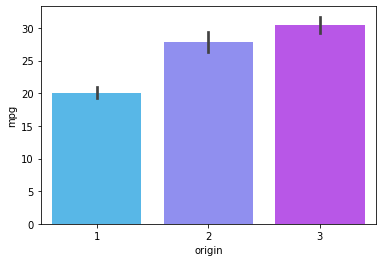

In [9]:
sns.barplot(x='origin', y='mpg', data=df, palette='cool')

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

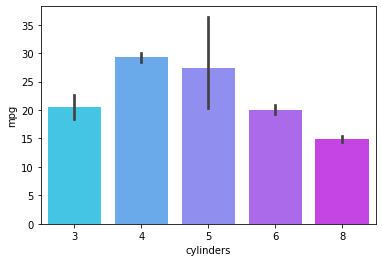

In [10]:
# 
sns.barplot(x='cylinders', y='mpg', data=df, palette='cool')

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'MPG')

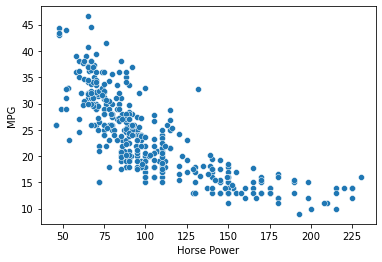

In [11]:
# PLoting mpg against horse power
sns.scatterplot(df['horsepower'], df['mpg'])
plt.xlabel("Horse Power")
plt.ylabel("MPG")

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'MPG')

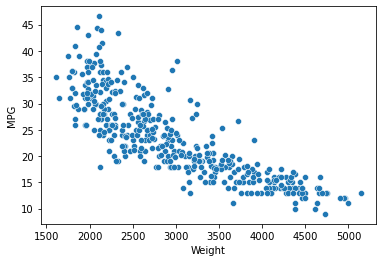

In [12]:
# PLoting mpg against Weight
sns.scatterplot(df['weight'], df['mpg'])
plt.xlabel("Weight")
plt.ylabel("MPG")

<AxesSubplot:xlabel='model year', ylabel='mpg'>

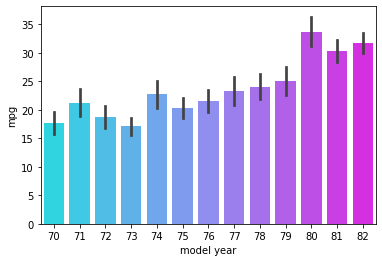

In [13]:
sns.barplot(x='model year', y='mpg', data=df, palette='cool')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'MPG')

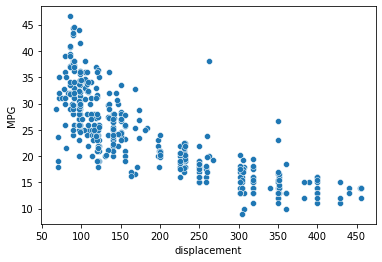

In [15]:
# PLoting mpg against displacement
sns.scatterplot(df['displacement'], df['mpg'])
plt.xlabel("displacement")
plt.ylabel("MPG")

# Data Prep
### Data cleaning

In [16]:
# CHecking for nan values
for l in df:
    print(f'No of nAn in {l}: ', df[l].isna().sum())

No of nAn in mpg:  0
No of nAn in cylinders:  0
No of nAn in displacement:  0
No of nAn in horsepower:  6
No of nAn in weight:  0
No of nAn in acceleration:  0
No of nAn in model year:  0
No of nAn in origin:  0
No of nAn in car name:  0


In [17]:
# CHecking for null values
for l in df:
    print(f'No of null in {l}: ', df[l].isnull().sum())

No of null in mpg:  0
No of null in cylinders:  0
No of null in displacement:  0
No of null in horsepower:  6
No of null in weight:  0
No of null in acceleration:  0
No of null in model year:  0
No of null in origin:  0
No of null in car name:  0


In [18]:
# Droping nan values
df = df.dropna()

In [19]:
for l in df:
    print(f'No of nAn in {l}: ', df[l].isna().sum())

No of nAn in mpg:  0
No of nAn in cylinders:  0
No of nAn in displacement:  0
No of nAn in horsepower:  0
No of nAn in weight:  0
No of nAn in acceleration:  0
No of nAn in model year:  0
No of nAn in origin:  0
No of nAn in car name:  0


In [20]:
# CHecking for null values
for l in df:
    print(f'No of null in {l}: ', df[l].isnull().sum())

No of null in mpg:  0
No of null in cylinders:  0
No of null in displacement:  0
No of null in horsepower:  0
No of null in weight:  0
No of null in acceleration:  0
No of null in model year:  0
No of null in origin:  0
No of null in car name:  0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [22]:
# droping car name
df = df.drop('car name', 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_16380\3702129968.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('car name', 1)


In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Categorical variables to One-hot-encoded variables

In [24]:
# COnverting categorical nominal variable to dummies
origin_dummy =  pd.get_dummies(df['origin'], drop_first=True, prefix='origin')
origin_dummy.head()

,origin_2,origin_3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [25]:
# Merging the dummy variables with df
df = pd.concat([df, origin_dummy], 1)

C:\Users\amita\AppData\Local\Temp\ipykernel_16380\827818263.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df, origin_dummy], 1)


In [26]:
# Droping origin
df = df.drop('origin', 1)
df.head()

C:\Users\amita\AppData\Local\Temp\ipykernel_16380\2197664395.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('origin', 1)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


## train test split

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [28]:
# Splitting data to x and y
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [29]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [30]:
# CHecking the shape of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 8)
(98, 8)
(294,)
(98,)


## Normalizing data

In [31]:
to_norm = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

In [32]:
scalar_x = StandardScaler()
#scalar_y = StandardScaler()

X_train[to_norm] = scalar_x.fit_transform(X_train[to_norm])
#y_train= scalar_y.fit_transform(y_train.to_numpy().reshape(-1,1))

In [33]:
X_test[to_norm] = scalar_x.transform(X_test[to_norm])
#y_test = scalar_y.transform(y_test.to_numpy().reshape(-1,1))

In [34]:
# CHecking the shape of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 8)
(98, 8)
(294,)
(98,)


# Building model

# Linear regression

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

Y_pred = lr.predict(X_test)

### Model evaluation

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean absolute error
mae = mean_absolute_error(y_test, Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate mean squared error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate root mean squared error
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, Y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

Mean Absolute Error (MAE): 2.67
Mean Squared Error (MSE): 11.05
Root Mean Squared Error (RMSE): 3.32
R-squared (Coefficient of Determination): 0.80


C:\Users\amita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

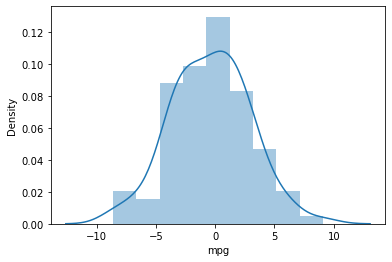

In [37]:
# Residual analysis
res = y_test - Y_pred

sns.distplot(res)

In [42]:
for l,r, in zip(X_test.columns, list(lr.coef_)):
    print(f'{l}: {r} ')

cylinders: -0.5029670083112654 
displacement: 2.652063962860762 
horsepower: -1.2919291527023984 
weight: -5.493440369311285 
acceleration: 0.37707852805710373 
model year: 2.8287628205239117 
origin_2: 2.722352376276845 
origin_3: 3.1658316304746923 


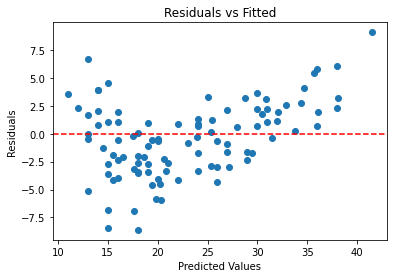

In [43]:
# Residual analysis (Homoscedasticity)
plt.scatter(y_test, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.show()

# Neural Network

In [86]:
inputShape =  X_train.shape[1]

In [87]:
# Model structure

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [88]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                576       
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Using ModelCheckpoint to save the best model

checkpoint = ModelCheckpoint(
    'best_model.h5',  # Path where the model will be saved
    monitor='mae',   # Monitor the training loss
    verbose=1,        # Log when models are being saved
    save_best_only=True,  # Save only the best model
    mode='min',       # Minimization problem (lower loss is better)
    save_freq='epoch' # Check at the end of every epoch
)

In [90]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'] )

In [91]:
history = model.fit(X_train, y_train, epochs =100, verbose=1, callbacks=[checkpoint])

Epoch 1/100
 1/10 [==>...........................] - ETA: 2s - loss: 806.2957 - mae: 27.1504
Epoch 1: mae improved from inf to 23.27593, saving model to best_model.h5
10/10 [==============================] - 0s 6ms/step - loss: 604.9205 - mae: 23.2759
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 599.7600 - mae: 23.3090
Epoch 2: mae improved from 23.27593 to 22.50189, saving model to best_model.h5
10/10 [==============================] - 0s 5ms/step - loss: 569.2484 - mae: 22.5019
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 616.3918 - mae: 23.5203
Epoch 3: mae improved from 22.50189 to 21.54616, saving model to best_model.h5
10/10 [==============================] - 0s 6ms/step - loss: 527.5178 - mae: 21.5462
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 423.0982 - mae: 18.9390
Epoch 4: mae improved from 21.54616 to 20.25629, saving model to best_model.h5
10/10 [==============================] - 0s 5ms/step - loss: 4

Epoch 34/100
 1/10 [==>...........................] - ETA: 0s - loss: 12.4681 - mae: 2.5610
Epoch 34: mae improved from 2.95787 to 2.81269, saving model to best_model.h5
10/10 [==============================] - 0s 5ms/step - loss: 13.5152 - mae: 2.8127
Epoch 35/100
 1/10 [==>...........................] - ETA: 0s - loss: 11.4698 - mae: 2.7451
Epoch 35: mae did not improve from 2.81269
10/10 [==============================] - 0s 2ms/step - loss: 13.5923 - mae: 2.8141
Epoch 36/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.7308 - mae: 2.3707
Epoch 36: mae did not improve from 2.81269
10/10 [==============================] - 0s 2ms/step - loss: 13.8676 - mae: 2.8987
Epoch 37/100
 1/10 [==>...........................] - ETA: 0s - loss: 12.7491 - mae: 2.7488
Epoch 37: mae did not improve from 2.81269
10/10 [==============================] - 0s 2ms/step - loss: 13.5852 - mae: 2.8855
Epoch 38/100
 1/10 [==>...........................] - ETA: 0s - loss: 13.1202 - mae: 2.9006
Ep

 1/10 [==>...........................] - ETA: 0s - loss: 9.5627 - mae: 2.1705
Epoch 70: mae did not improve from 2.24431
10/10 [==============================] - 0s 2ms/step - loss: 9.5864 - mae: 2.2917
Epoch 71/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.5393 - mae: 2.3622
Epoch 71: mae improved from 2.24431 to 2.22284, saving model to best_model.h5
10/10 [==============================] - 0s 5ms/step - loss: 9.2363 - mae: 2.2228
Epoch 72/100
 1/10 [==>...........................] - ETA: 0s - loss: 10.0444 - mae: 2.5203
Epoch 72: mae did not improve from 2.22284
10/10 [==============================] - 0s 2ms/step - loss: 10.0329 - mae: 2.3797
Epoch 73/100
 1/10 [==>...........................] - ETA: 0s - loss: 11.0775 - mae: 2.5013
Epoch 73: mae did not improve from 2.22284
10/10 [==============================] - 0s 2ms/step - loss: 9.6038 - mae: 2.3208
Epoch 74/100
 1/10 [==>...........................] - ETA: 0s - loss: 7.2477 - mae: 2.2320
Epoch 74: mae did no

In [ ]:
# Making predictions

In [93]:
y_pred = model.predict(X_test)

### Comparing the Linear regression model and the neural network

In [95]:
# Linear regression
# Calculate mean absolute error
mae = mean_absolute_error(y_test, Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate mean squared error
mse = mean_squared_error(y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate root mean squared error
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, Y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

Mean Absolute Error (MAE): 2.67
Mean Squared Error (MSE): 11.05
Root Mean Squared Error (RMSE): 3.32
R-squared (Coefficient of Determination): 0.80


In [96]:
# Neural network
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate root mean squared error
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

Mean Absolute Error (MAE): 1.97
Mean Squared Error (MSE): 7.45
Root Mean Squared Error (RMSE): 2.73
R-squared (Coefficient of Determination): 0.87
